# New York City Taxi Trip Duration

# File descriptions

**train.csv** - the training set (contains 1458644 trip records)<br>
**test.csv** - the testing set (contains 625134 trip records)<br>
**sample_submission.csv** - a sample submission file in the correct format

# Data fields

**id** - a unique identifier for each trip<br>
**vendor_id** - a code indicating the provider associated with the trip record<br>
**pickup_datetime** - date and time when the meter was engaged<br>
**dropoff_datetime** - date and time when the meter was disengaged<br>
**passenger_count** - the number of passengers in the vehicle (driver entered value)<br>
**pickup_longitude** - the longitude where the meter was engaged<br>
**pickup_latitude** - the latitude where the meter was engaged<br>
**dropoff_longitude** - the longitude where the meter was disengaged<br>
**dropoff_latitude** - the latitude where the meter was disengaged<br>
**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip<br>
**trip_duration** - duration of the trip in seconds

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

In [3]:
INPUT_FOLDER='/Users/pd186040/Documents/Kaggle/NYC Taxi Trip Duration/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
    if 'zip' not in f:
       print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
.DS_Store                     6.15 KB
sample_submission.csv         8751.89 KB
test.csv                      70794.29 KB
train.csv                     200589.1 KB


In [4]:
train= pd.read_csv("/Users/pd186040/Documents/Kaggle/NYC Taxi Trip Duration/train.csv")

In [5]:
train.shape

(1458644, 11)

In [6]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
test=pd.read_csv("/Users/pd186040/Documents/Kaggle/NYC Taxi Trip Duration/test.csv")

In [8]:
test.shape

(625134, 9)

In [9]:
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Missing Values

In [10]:
#checking for missing values
train_total=train.isnull().sum()
train_total

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [11]:
vendor_count=train['vendor_id'].value_counts()
vendor_count

2    780302
1    678342
Name: vendor_id, dtype: int64

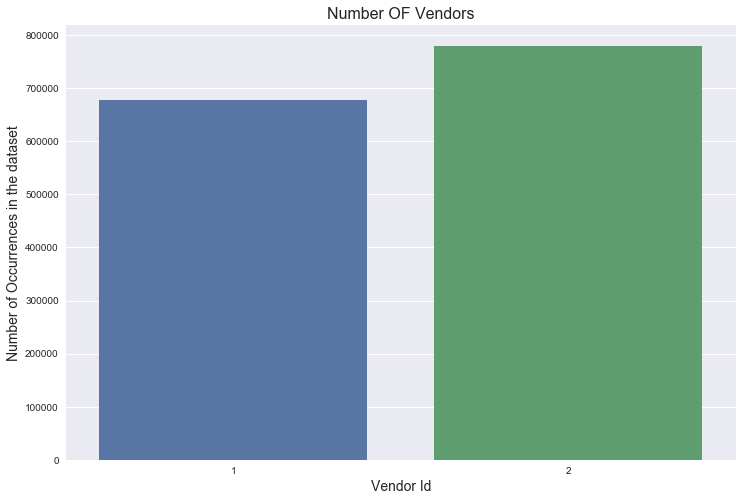

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(vendor_count.index, vendor_count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Vendor Id', fontsize=14)
plt.title('Number OF Vendors', fontsize=16)

In [13]:
passg_count=train['passenger_count'].value_counts()
passg_count

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

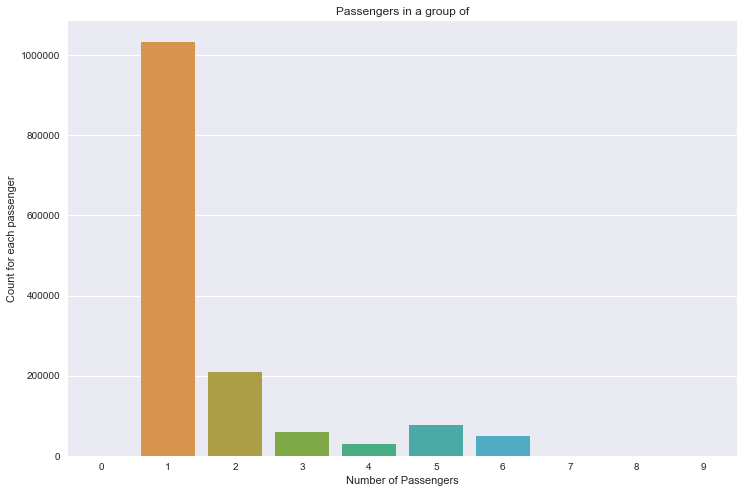

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(passg_count.index, passg_count.values)
plt.title("Passengers in a group of")
plt.ylabel("Count for each passenger")
plt.xlabel("Number of Passengers");


Most popular choice of travel is single. and 2nd popular way of ride is with a single friend. and may be for long cars popular choice of travel is in group of 5 and then in group of 6 people. There are only 3 trips in group of 7 and single trip in group of 8 and 9 each. There are 60 trips with zero passengers. Those must be outliers and have to be removed. Because no taxi ride can happen without passenger, atleast paid one.

In [15]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)

In [16]:
train.loc[:, 'pick_date'] = train['pickup_datetime'].dt.date
train.loc[:, 'pick_month'] = train['pickup_datetime'].dt.month
train.loc[:, 'week_of_year'] = train['pickup_datetime'].dt.weekofyear
train.loc[:, 'day_of_year'] = train['pickup_datetime'].dt.dayofyear
train.loc[:, 'day_of_week'] = train['pickup_datetime'].dt.dayofweek
train.loc[:, 'time'] = train['pickup_datetime'].dt.time
train.loc[:, 'hour'] = train['pickup_datetime'].dt.hour

In [17]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_date,pick_month,week_of_year,day_of_year,day_of_week,time,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,11,74,0,17:24:55,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,23,164,6,00:43:35,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,3,19,1,11:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,14,97,2,19:32:31,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,12,86,5,13:30:55,13


In [18]:
grouped =train.groupby(["hour"])["id"].aggregate({'Total_Id': 'count'}).reset_index()
grouped.sort_values(by='Total_Id', ascending=False, inplace=True)
grouped.head()

/Users/pd186040/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,hour,Total_Id
18,18,90600
19,19,90308
21,21,84185
20,20,84072
22,22,80492


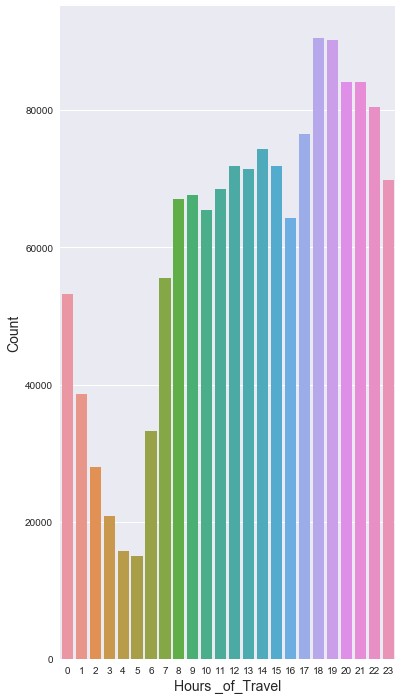

In [19]:
plt.figure(figsize=(6,12))
sns.barplot(grouped.hour, grouped.Total_Id)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Hours _of_Travel', fontsize=14)
plt.show()

As we can see that there are O hours of travel which is not at all possible so assuming it to be the outliers ,we will try to eliminate the  same